In [1]:
import re
import pandas as pd
import numpy as np
import itertools
import matplotlib.pyplot as plt
import pickle
import seaborn as sns

First let's import our annotator and mapper classes from `Annotate_patients.py`.

In [2]:
# import the data
from Annotate_patients import PatientAnnotator, AnswerMapper

drug_dictionary = pickle.load(open('data/drug_dictionary.p', 'rb'))

mapper = AnswerMapper('data/Covidence_12Aug20_DrgExtra.csv', drug_dictionary)

Then we map the survey answers with the `map_answers()` method, update the drug dictionary, and create an instance of the `PatientAnnotator` class with the cleaned medications and updated drug dictionary as arguments. The `PatientAnnotator` class has a `count_BNF_mappings()` method for counting different types of mappings.

In [3]:
# get survey answer mappings
mapper.map_answers()
mapper.update_drug_dictionary('data/answer_mappings_complete.csv')

# get BNF mappings
annotator = PatientAnnotator(mapper.meds_cleaned, mapper.drug_dictionary)
annotator.count_BNF_mappings()

20813 survey answers mapped
3008 survey answers unmapped
1478 BNF drugs mapped
66 BNF drugs unmapped


We then put the lists into a dictionary and count/plot the items for both the BNF entries and survey answers.

In [4]:
# get counts for different mapping categories
BNF_mapping_counts = {'exact': len(annotator.bnf_mapped), 'first_name': len(annotator.bnf_first_name_mapped), 
                      'unmapped': len(annotator.bnf_unmapped)}

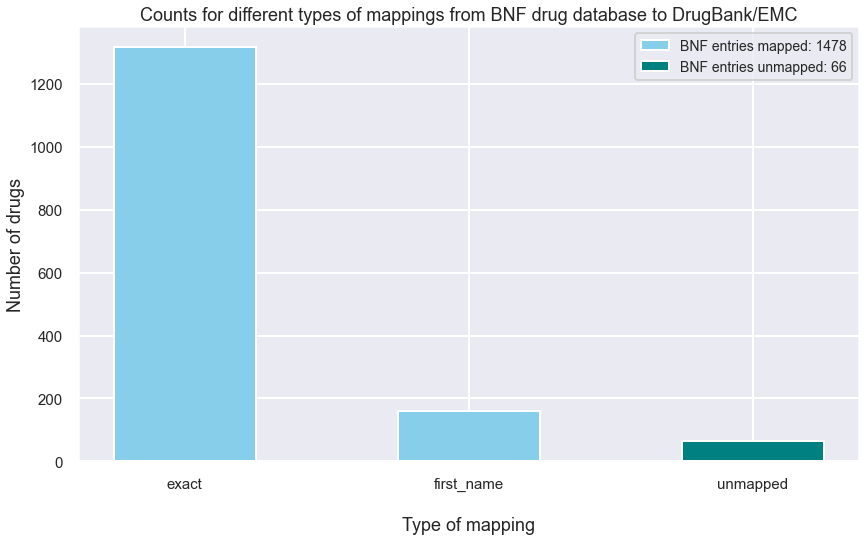

In [5]:
sns.set_context('poster')
sns.set_style('darkgrid')
plt.figure(figsize=(14,8))
bar = plt.bar(x = BNF_mapping_counts.keys(), height = BNF_mapping_counts.values(), width = 0.5, color = ['skyblue', 'skyblue', 'teal'])
plt.title('Counts for different types of mappings from BNF drug database to DrugBank/EMC', fontsize=18)
plt.xlabel('\nType of mapping', fontsize=18)
plt.xticks(fontsize=15)
plt.ylabel('Number of drugs', fontsize=18)
plt.yticks(fontsize=15)
legend_text = ['BNF entries mapped: {}'.format(BNF_mapping_counts['exact'] + BNF_mapping_counts['first_name']),
               'BNF entries unmapped: {}'.format(BNF_mapping_counts['unmapped'])]
plt.legend(handles = [bar.patches[0], bar.patches[2]], labels = legend_text, fontsize = 14)
plt.savefig('figures/bnf_mappings')
plt.show()

In [6]:
# get counts for different mapping categories
mapping_counts = {'exact': len(mapper.mapped_survey_answers),
                  'first_name': len(mapper.first_name_mapped_survey_answers),
                  'phonetic_encoding': len(mapper.mapped_by_encoding), 'unmapped': len(mapper.unmapped_by_encoding)}

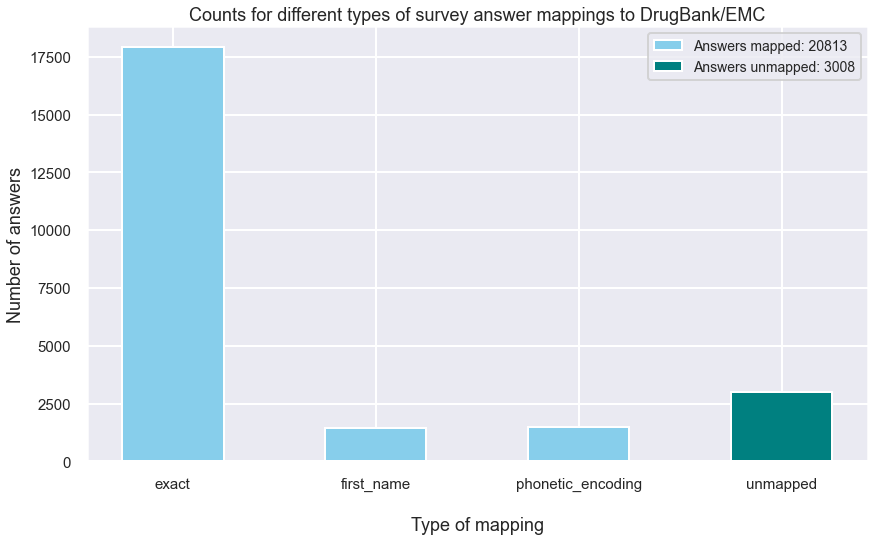

In [7]:
sns.set_context('poster')
sns.set_style('darkgrid')
plt.figure(figsize=(14,8))
bar = plt.bar(x = mapping_counts.keys(), height = mapping_counts.values(), color = ['skyblue']*3 + ['teal'], width = 0.5)
plt.title('Counts for different types of survey answer mappings to DrugBank/EMC', fontsize=18)
plt.xlabel('\nType of mapping', fontsize=18)
plt.xticks(fontsize=15)
plt.ylabel('Number of answers', fontsize=18)
plt.yticks(fontsize=15)
legend_text = ['Answers mapped: {}'.format(mapping_counts['exact'] + mapping_counts['first_name'] + mapping_counts['phonetic_encoding']), 
              'Answers unmapped: {}'.format(mapping_counts['unmapped'])]
plt.legend(handles = [bar.patches[0], bar.patches[3]], labels = legend_text, fontsize = 14)
plt.savefig('figures/survey_mappings.png')
plt.show()